In [1]:
from PyHeisenberg import HeisenbergGraph, DataAnalyzer, NaiveSpinGraph
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('FigureStyle.mplstyle')

In [32]:
testGraph = HeisenbergGraph(
    spinInteractions={
        (0, 1): [0.5, 0.2, 0.7],
    },
    externalField={
        0: [1.0, 0.0, 1.0],
        1: [1.0, 0.8, 1.0],
    },
    localSimulation=True,
    backendName='qasm_simulator',
    noisySimulation=False
)
testAnalyzer = DataAnalyzer(spinGraph=testGraph)

In [4]:
measurementFitter = testGraph.getCalibrationFitter()

Job Status: job has successfully run


In [33]:
testEnergy = testGraph.quantumHamiltonianExpVal(QuantumCircuit(2))
exactEnergy = testGraph.exactHamiltonianExpVal()
print(testEnergy)
print(exactEnergy)


2.66142578125
2.7


In [35]:
Eexp = testGraph.annihilationEnergy(Period=20, STEPS=40)
Eteor = testGraph.groundStateEnergy()
print(f"Experimental Energy: {Eexp} u. a.")
print(f"Theoretical Energy: {Eteor.real} u. a.")
print(f"Relative error: {np.abs(Eexp/Eteor.real - 1)}")

Experimental Energy: -2.52109375 u. a.
Theoretical Energy: -2.622461999935016 u. a.
Relative error: 0.038653848916601286


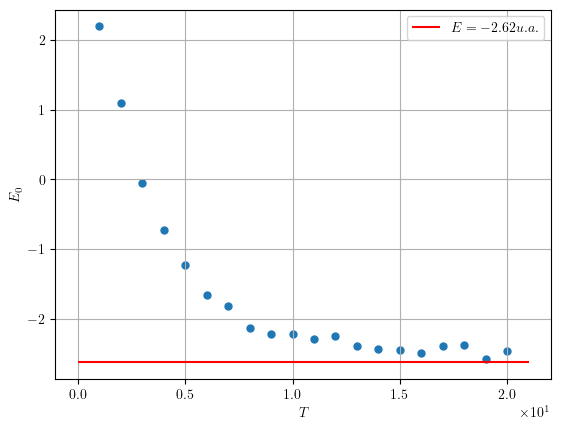

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 2.19189453,  1.09746094, -0.04785156, -0.72333984, -1.22861328,
        -1.65859375, -1.80654297, -2.12880859, -2.20820313, -2.21894531,
        -2.28730469, -2.24921875, -2.39160156, -2.43134766, -2.43740234,
        -2.49013672, -2.38837891, -2.37890625, -2.56816406, -2.46435547]))

In [17]:
testAnalyzer.annealingProcessGraph(maxPeriod=20, periodStep=1, STEPS=50)

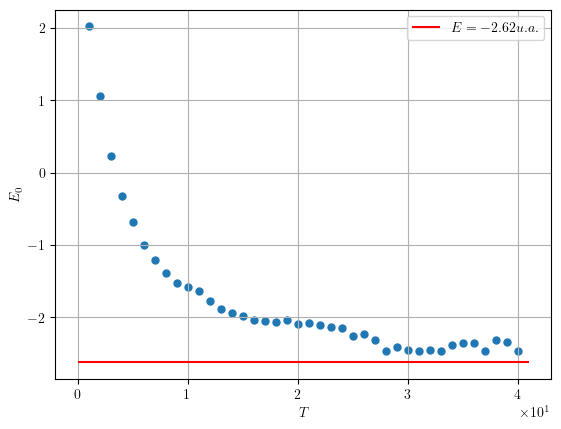

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40]),
 array([ 2.02333984,  1.06064453,  0.22558594, -0.31669922, -0.68349609,
        -0.99541016, -1.20898438, -1.38710938, -1.52587891, -1.57304687,
        -1.63115234, -1.76992188, -1.88320312, -1.93662109, -1.97509766,
        -2.03896484, -2.04414062, -2.06865234, -2.03105469, -2.0875    ,
        -2.08007812, -2.10478516, -2.13613281, -2.14121094, -2.25693359,
        -2.23046875, -2.31826172, -2.46054687, -2.40722656, -2.44931641,
        -2.46621094, -2.44892578, -2.45976563, -2.37939453, -2.35908203,
        -2.35322266, -2.46357422, -2.31582031, -2.33652344, -2.47011719]))

In [35]:
testAnalyzer.annealingProcessGraph(maxPeriod=40, periodStep=1, STEPS=120)


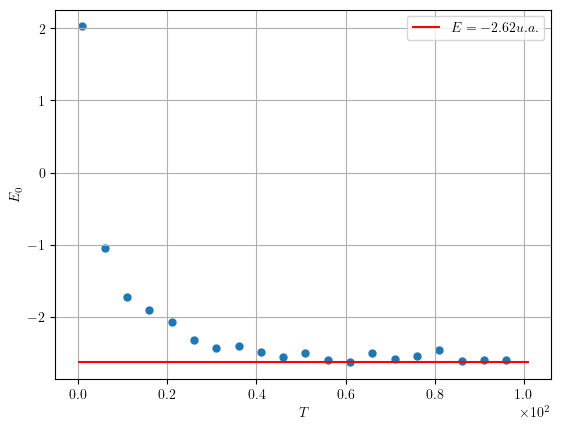

(array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
        86, 91, 96]),
 array([ 2.02685547, -1.03886719, -1.71621094, -1.90722656, -2.06767578,
        -2.31494141, -2.43271484, -2.39482422, -2.48085937, -2.54882812,
        -2.50087891, -2.58847656, -2.62734375, -2.5       , -2.57568359,
        -2.5359375 , -2.46279297, -2.60527344, -2.58994141, -2.59804688]))

In [3]:
testAnalyzer.annealingProcessGraph(maxPeriod=100, periodStep=5, STEPS=250)

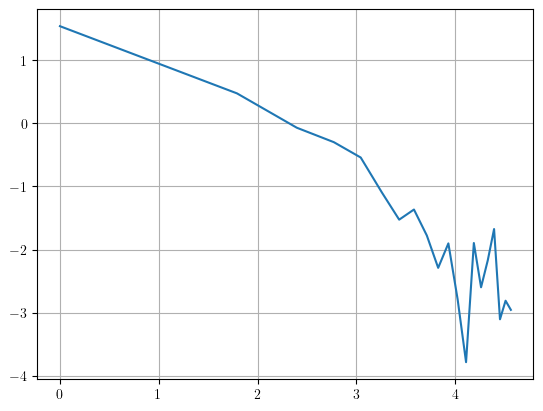

In [12]:
T = np.array([1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
           86, 91, 96])
E = np.array([2.02685547, -1.03886719, -1.71621094, -1.90722656, -2.06767578,
           -2.31494141, -2.43271484, -2.39482422, -2.48085937, -2.54882812,
           -2.50087891, -2.58847656, -2.62734375, -2.5, -2.57568359,
           -2.5359375, -2.46279297, -2.60527344, -2.58994141, -2.59804688])
plt.show()
